# PWAVE-C

Section or discrete


In [1]:
# force Jupyter to autoreload modules when they have been edited
# this helps keep the iodp module current as it is actively developed.
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import os
from importlib import reload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from iodp import utils



In [5]:
# Ensure we are in the PhysicalProperties root folder
if not os.getcwd().endswith("PhysicalProperties"):
    print("Current working directory:", os.getcwd())
    os.chdir("../")
    
print("New current working directory:", os.getcwd())

New current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\PhysicalProperties


## Read PWAVE-C .PWC files

In [9]:
file = './data/input/PWAVE-C/caliper-x_393-u1558d-2r-1-w_shlf11621761_2206290510083.pwc'
df = utils.read_instrument_file(file,as_dataframe=True)
df

,datetime,labelid,user,text_id,instrument,instrument_group,comments,distance_in_caliper,travel_time,offset,velocity_x,timestamp,system_delay,liner_time_correction,run,config,transducer_signal,aux_file
0,22-06-29 05:10:083 UTC,393-U1558D-2R-1-W,,SHLF11621761,CALIPERPWC,GANTRY,,28.5004,17.04,17.47,1672.30,2022-06-29 05:09:44,3.79,1.23,c:\data\in\caliper-x_393-u1558d-2r-1-w_shlf116...,c:\ims\config_velocity\velocity.ini,c:\data\in\signal\caliper-x_393-u1558d-2r-1-w_...,c:\aux_data\pwave-c\caliperpwc\393-u1558d-2r-1...


## Read PWAVE-C .ini files

In [10]:
file = './data/input/PWAVE-C/velocity.ini'
df = utils.read_instrument_ini(file, as_dataframe=True)
df

,value
key,
mgi rwa section options,2.0.1 %04Y%02m%02d %02H%02M%S%25u*~|.%d*~|....
instrument group,GANTRY
caliper.enabled?(t),FALSE
caliper.inst offset,1.5784
caliper.system delay,3.790227081791E-6
...,...
bayonets parameters.pulser s/n,
bayonets parameters.pulser manufacturer,
bayonets parameters.o-scope model,


## Read PWAVE-C .lvm files


In [34]:
data

{'writer_version': '2',
 'reader_version': '2',
 'operator': 'daq',
 'description': 'Transducer signal file .LVM (ASCII)',
 'date': '2022/06/23',
 'time': '18:01:19.3878006935119628906',
 'channels': '1',
 'samples': '8000',
 'delta_x': '1.000000E-8'}

In [61]:
file = "./data/input/PWAVE-C/caliper-x_393-u1558d-2r-1-w_shlf11621761_signal_2206290510083.lvm"
def read_pwavec_lvm_file(file, only_profile:bool=False) -> pd.DataFrame:
    content = []
    with open(file, "r") as f:
        for l in f:
            t = l.strip()
            if len(t) > 0:
                content.append(t)

    data = {
        "writer_version": content[1].split(",")[-1],
        "reader_version": content[2].split(",")[-1],
        "operator": content[8].split(",")[-1],
        "description": content[9].split(",", maxsplit=1)[-1],
        "date": content[10].split(",")[-1],
        "time": content[11].split(",")[-1],
        "channels": content[14].split(",",maxsplit=1)[-1].rstrip(','),
        "samples": content[15].split(",",maxsplit=1)[-1].rstrip(','),
        "delta_x": content[20].split(",",maxsplit=1)[-1].rstrip(',')  
    }
            
    df = pd.DataFrame(
        list(map(lambda x: x.split(","), content[23:])),
        columns=content[22].split(",")[0:2]
                )

    if only_profile:
        return df

    df = pd.concat(
        [
            pd.DataFrame(data, index=range(df.shape[0])),
            df
        ],
        axis=1
    )
    
    return df

In [62]:
df = read_pwavec_lvm_file(file)
df

,writer_version,reader_version,operator,description,date,time,channels,samples,delta_x,X_Value,Untitled
0,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,0.000000,0.000000
1,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,1.000000E-8,0.000000
2,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,2.000000E-8,0.000000
3,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,3.000000E-8,0.000000
4,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,4.000000E-8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
7995,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,7.995000E-5,0.007648
7996,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,7.996000E-5,0.007314
7997,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,7.997000E-5,0.006945
7998,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,7.998000E-5,0.006565


# Exploring PWAVE-C

In [63]:
df = read_pwavec_lvm_file(file)
df

,writer_version,reader_version,operator,description,date,time,channels,samples,delta_x,X_Value,Untitled
0,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,0.000000,0.000000
1,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,1.000000E-8,0.000000
2,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,2.000000E-8,0.000000
3,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,3.000000E-8,0.000000
4,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,4.000000E-8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
7995,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,7.995000E-5,0.007648
7996,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,7.996000E-5,0.007314
7997,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,7.997000E-5,0.006945
7998,2,2,daq,Transducer signal file .LVM (ASCII),2022/06/23,18:01:19.3878006935119628906,1,8000,1.000000E-8,7.998000E-5,0.006565


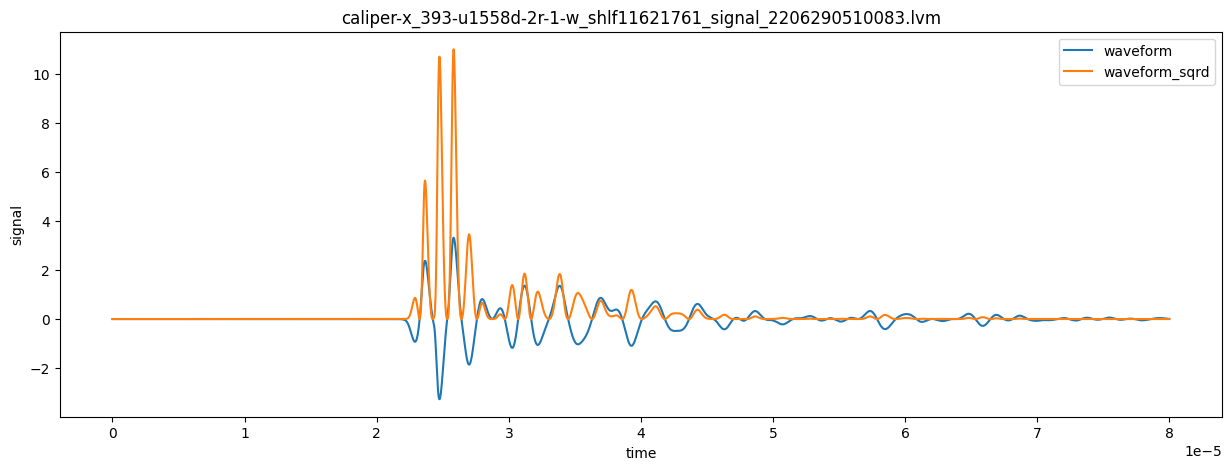

In [74]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(
    df['X_Value'].astype(float),
    df['Untitled'].astype(float),
    label="waveform"
)

ax.plot(
    df['X_Value'].astype(float),
    np.square(df['Untitled'].astype(float)),
    label="waveform_sqrd"
)

ax.set_ylabel('signal')
ax.set_xlabel('time')
ax.set_title(f"{os.path.split(file)[-1]}")
ax.legend()
plt.show()

In [76]:
file = './data/input/PWAVE-C/caliper-x_393-u1558d-2r-1-w_shlf11621761_2206290510083.pwc'
pwc = utils.read_instrument_file(file)
pwc

{'datetime': '22-06-29 05:10:083 UTC',
 'labelid': '393-U1558D-2R-1-W',
 'user': '',
 'text_id': 'SHLF11621761',
 'instrument': 'CALIPERPWC',
 'instrument_group': 'GANTRY',
 'comments': '',
 'distance_in_caliper': '28.5004',
 'travel_time': '17.04',
 'offset': '17.47',
 'velocity_x': '1672.30',
 'timestamp': '2022-06-29 05:09:44',
 'system_delay': '3.79',
 'liner_time_correction': '1.23',
 'run': 'c:\\data\\in\\caliper-x_393-u1558d-2r-1-w_shlf11621761_2206290510083.pwc',
 'config': 'c:\\ims\\config_velocity\\velocity.ini',
 'transducer_signal': 'c:\\data\\in\\signal\\caliper-x_393-u1558d-2r-1-w_shlf11621761_signal_2206290510083.lvm',
 'aux_file': 'c:\\aux_data\\pwave-c\\caliperpwc\\393-u1558d-2r-1-w_2206290510083_pwave-c.csv'}